# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 4 submission</b></u>

### Roster Name: Nand Kishore Khuswaha
### Student ID: 013920192
### Email address: nandkishore.khuswaha@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.
1. SVM.breast.ipynb (class file)
2. SVM.iris.ipynb (class file

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix



In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
# 1.Load the data.
datafile = pd.read_csv("/Users/becoming1/Desktop/homework4_input_data.csv")

In [4]:
print(datafile)

                   id      ASS1       SPX  C6orf141       SP5       SP6  \
0     TCGA-AB-2828-03  3.935027  0.523329  0.000000  0.000000  0.102277   
1     TCGA-AB-2846-03  3.372801  0.000000  0.000000  0.000000  0.116270   
2     TCGA-AB-2870-03  4.198301  0.000000  0.000000  0.000000  0.249176   
3     TCGA-AB-2872-03  4.115014  0.000000  0.000000  0.222018  0.632254   
4     TCGA-AB-2881-03  3.662169  0.467823  0.000000  0.000000  0.000000   
5     TCGA-AB-2886-03  4.575868  0.000000  0.000000  0.000000  0.181481   
6     TCGA-AB-2888-03  3.018633  0.000000  0.000000  0.000000  0.102277   
7     TCGA-AB-2889-03  3.358113  0.000000  0.000000  0.000000  0.102277   
8     TCGA-AB-2892-03  3.509887  0.000000  0.000000  0.000000  0.181481   
9     TCGA-AB-2937-03  4.246335  0.000000  0.000000  0.000000  0.132694   
10    TCGA-AB-2942-03  3.931392  0.000000  0.000000  0.000000  0.112994   
11    TCGA-AB-2950-03  5.284549  0.000000  0.000000  0.000000  0.181481   
12    TCGA-AB-2980-03  4.

In [5]:
X= datafile.loc[ : ,datafile.columns.difference(['id', 'Class'])]
Y = datafile['Class']
class_names = ['Breast', 'Bladder', 'Colon','Glioblastoma','Head&Neck','Kidney','Leukemia','LungAdeno','LungSquamous',
          'Ovarian','Rectal','Uterine']


In [6]:
# 2.Produce a PCA plot of the input data, using the colors specified above.
pca = PCA(n_components=2)   
pca.fit(X)
print(pca.explained_variance_ratio_)


[0.09413699 0.08021269]


In [7]:
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, datafile[['Class']]], axis = 1)



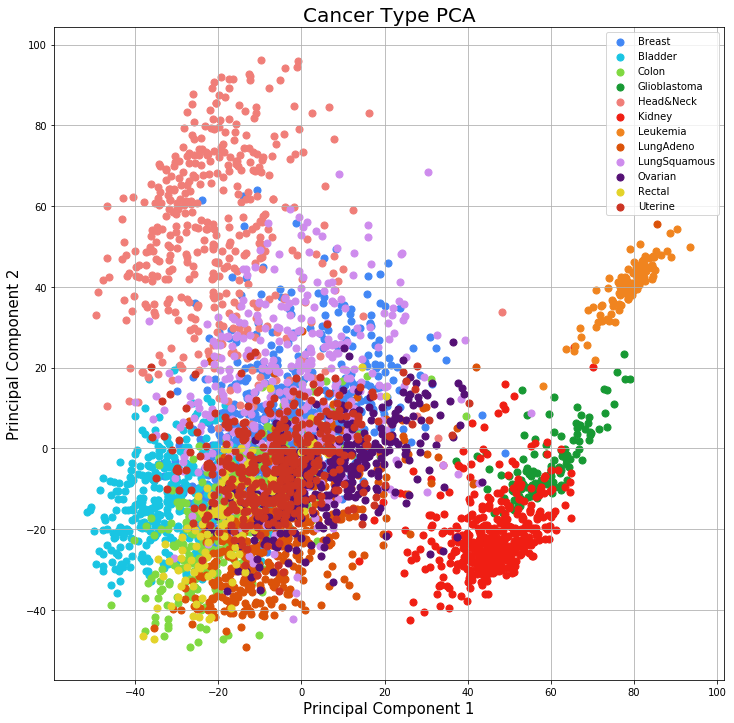

In [8]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Cancer Type PCA', fontsize = 20)

colors = {"Breast": '#4287f5',
          "Bladder": '#19c5e3',
          "Colon": '#80d941',
          "Glioblastoma": '#179933',
          "Head&Neck": '#f07e78',
          "Kidney": '#f01e13',
          "Leukemia": '#f0841f', 
          "LungAdeno": '#db5209',    
          "LungSquamous": '#ce8ced',  
          "Ovarian": '#551075',  
          "Rectal": '#e3d329',       
          "Uterine": '#cc3423'}

for target in colors:
    indicesRequired = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesRequired, 'principal component 1'],
              finalDf.loc[indicesRequired, 'principal component 2'],
              c = colors[target],
              s= 50)

ax.legend(colors)
ax.grid()



In [9]:
# 3.Normalize the data using StandardScaler. 
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

In [10]:
# 4.Break the data into the training and test datasets at 80/20 proportion. 
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0,stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3468, 3000), (3468,), (868, 3000), (868,))

In [11]:
# 5.Define SVM model hyperparameters 
model = LinearSVC(multi_class='ovr', class_weight='balanced')


In [12]:
# 6.Run and report results from 5-fold cross-validation
crosValAcc = cross_val_score(model, X, Y,cv=5,n_jobs=-1)
crossValAccstr = str(crosValAcc) 
print('Individual cross validation accuracies: ' + crossValAccstr)
meanAcc = sum(crosValAcc/5)
print('Accuracy of linear SVC on training set: {:.2f}'.format(meanAcc))


Individual cross validation accuracies: [0.9735023  0.9561707  0.96770473 0.95847751 0.96655133]
Accuracy of linear SVC on training set: 0.96


In [13]:
# 7.Train the final model on all the training data
model = LinearSVC(multi_class='ovr', class_weight='balanced').fit(X_train,Y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.98


/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/becoming1/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[ 66   0   0   0   0   0   0   0   0   0   0   0]
 [  0 175   0   0   0   0   0   0   0   0   0   0]
 [  0   0  69   0   0   0   0   0   0   0   5   0]
 [  0   0   0  21   0   0   0   0   0   0   0   2]
 [  0   0   0   0  83   0   0   0   0   0   0   0]
 [  0   0   0   0   0  84   0   0   0   0   0   0]
 [  0   0   0   0   0   0  20   0   0   0   0   0]
 [  0   0   0   0   0   0   0  83   2   0   0   0]
 [  0   0   0   0   0   0   2   2  74   0   0   0]
 [  0   0   0   0   0   0   0   0   0  68   0   0]
 [  0   0   8   0   0   0   0   0   0   0  18   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.93 0.   0.   0.   0.   0.   0.   0.   0.07 0.  ]
 [0.   0.   0.   0.91 0.   0.   0.   0.   0.   0.   0.   0.09]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.

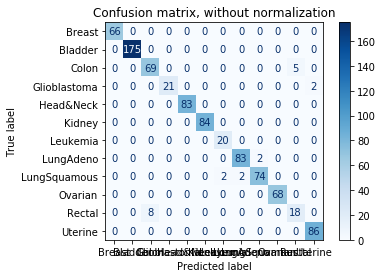

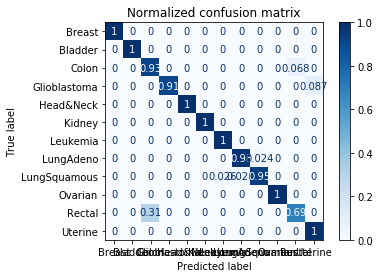

In [16]:
# 8.Plot two confusion matrices for test set predictions 
np.set_printoptions(precision=2)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

